# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# create loop for all cities in list- Enumerate() method adds a counter to an iterable and returns it in a form of enumerate
# object. 
# This enumerate object can then be used directly in for loops or be converted into a list of tuples using list() method.
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for clarity in log- should always appear as x/50 of set x and then start count over after 50 and add one to the set number
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities-- to prevent errors from stopping our program we run the request in a try and except 
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        lat = city_weather["coord"]["lat"]
        lng = city_weather["coord"]["lon"]
        max_temp = city_weather["main"]["temp_max"]
        humidity = city_weather["main"]["humidity"]
        clouds = city_weather["clouds"]["all"]
        wind = city_weather["wind"]["speed"]
        country = city_weather["sys"]["country"]
        date = city_weather["dt"]

        # Append the City information into list
        city_data.append({"City": city, 
                          "Lat": lat, 
                          "Lng": lng, 
                          "Max Temp": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": clouds,
                          "Wind Speed": wind,
                          "Country": country,
                          "Date": date})

    # If an error is experienced, skip the city
    except:
        print("City can not be found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | comodoro rivadavia
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | san vicente
Processing Record 4 of Set 1 | russell
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | tuatapere
Processing Record 7 of Set 1 | carahue
Processing Record 8 of Set 1 | komsomolskiy
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | san nicolas
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | mount gambier
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | taolanaro
City can not be found. Skipping...
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | turangi
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | cayenne
Processing Record 20 of Set 1 | thunder bay
Processing Record 21 of Set 1 | mataura
Processing Reco

Processing Record 31 of Set 4 | tanabe
Processing Record 32 of Set 4 | maymanak
City can not be found. Skipping...
Processing Record 33 of Set 4 | tual
Processing Record 34 of Set 4 | torbay
Processing Record 35 of Set 4 | anadyr
Processing Record 36 of Set 4 | mahebourg
Processing Record 37 of Set 4 | egvekinot
Processing Record 38 of Set 4 | bambous virieux
Processing Record 39 of Set 4 | koumac
Processing Record 40 of Set 4 | chuy
Processing Record 41 of Set 4 | bargal
City can not be found. Skipping...
Processing Record 42 of Set 4 | ende
Processing Record 43 of Set 4 | nizhniy odes
Processing Record 44 of Set 4 | sioux lookout
Processing Record 45 of Set 4 | fomboni
Processing Record 46 of Set 4 | praia da vitoria
Processing Record 47 of Set 4 | san patricio
Processing Record 48 of Set 4 | vila velha
Processing Record 49 of Set 4 | beloha
Processing Record 0 of Set 5 | lebu
Processing Record 1 of Set 5 | khatanga
Processing Record 2 of Set 5 | east london
Processing Record 3 of Se

Processing Record 16 of Set 8 | tynda
Processing Record 17 of Set 8 | esmeraldas
Processing Record 18 of Set 8 | satitoa
City can not be found. Skipping...
Processing Record 19 of Set 8 | atbasar
Processing Record 20 of Set 8 | chuguyevka
Processing Record 21 of Set 8 | coquimbo
Processing Record 22 of Set 8 | kupang
Processing Record 23 of Set 8 | svetlyy
City can not be found. Skipping...
Processing Record 24 of Set 8 | iquique
Processing Record 25 of Set 8 | seinajoki
City can not be found. Skipping...
Processing Record 26 of Set 8 | inhambane
Processing Record 27 of Set 8 | tanacu
Processing Record 28 of Set 8 | stornoway
City can not be found. Skipping...
Processing Record 29 of Set 8 | lolua
City can not be found. Skipping...
Processing Record 30 of Set 8 | mahadday weyne
City can not be found. Skipping...
Processing Record 31 of Set 8 | zemio
Processing Record 32 of Set 8 | shelburne
Processing Record 33 of Set 8 | alta floresta
Processing Record 34 of Set 8 | auki
Processing Re

Processing Record 47 of Set 11 | barkhan
Processing Record 48 of Set 11 | veraval
Processing Record 49 of Set 11 | ancud
Processing Record 0 of Set 12 | pangoa
Processing Record 1 of Set 12 | karasjok
Processing Record 2 of Set 12 | simao
Processing Record 3 of Set 12 | juneau
Processing Record 4 of Set 12 | aguimes
Processing Record 5 of Set 12 | yantal
Processing Record 6 of Set 12 | okakarara
Processing Record 7 of Set 12 | faya
Processing Record 8 of Set 12 | arman
Processing Record 9 of Set 12 | santa cruz
Processing Record 10 of Set 12 | chontalpa
Processing Record 11 of Set 12 | maryville
Processing Record 12 of Set 12 | caravelas
Processing Record 13 of Set 12 | luzhou
Processing Record 14 of Set 12 | jiexiu
Processing Record 15 of Set 12 | beauvais
Processing Record 16 of Set 12 | sataua
City can not be found. Skipping...
Processing Record 17 of Set 12 | dikson
Processing Record 18 of Set 12 | kamenka
Processing Record 19 of Set 12 | hovd
Processing Record 20 of Set 12 | viequ

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame--creating variables here saves time in graph making later 
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
# city_data_pd.to_csv(output_data_file, index_label="City_ID")--- commented out because of error being given 

# Show Record Count
city_data_pd.count()

City          552
Cloudiness    552
Country       552
Date          552
Humidity      552
Lat           552
Lng           552
Max Temp      552
Wind Speed    552
dtype: int64

In [8]:
# show dataframe head
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,comodoro rivadavia,20,AR,1577717777,43,-45.87,-67.48,71.60,8.05
1,bluff,70,AU,1577717777,76,-23.58,149.07,71.51,10.69
2,san vicente,75,EC,1577717778,83,-0.59,-80.41,77.00,3.36
3,russell,1,US,1577717778,68,38.90,-98.86,30.99,21.92
4,puerto ayora,75,EC,1577717778,78,-0.74,-90.35,77.00,2.24


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

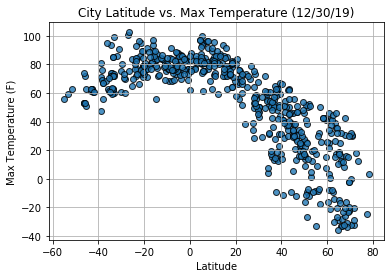

In [10]:
# Build scatter plot for lat vs. temp
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
# plt.savefig("output_data/Fig1.png")-- same issue 

# Show plot--- pretty neat seeing the difference two months later doing the same graph. This one shows some extreme cold 
plt.show()

#### Latitude vs. Humidity Plot

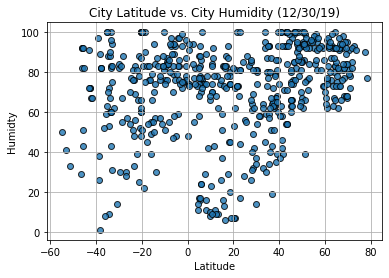

In [14]:
# Build scatter plot for humidity vs. temp
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. City Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidty")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
# plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

# even the humidity chart looks very different this time of year! 

#### Latitude vs. Cloudiness Plot

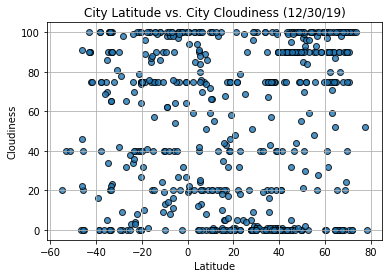

In [15]:
# Build scatter plot for cloudiness vs. temp
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. City Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
# plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

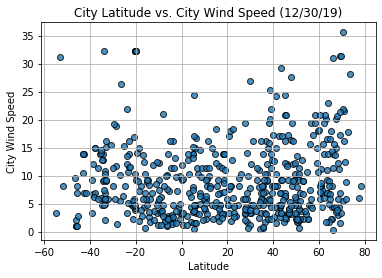

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. City Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("City Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
# plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

Ugh so I already did this but I lost it somehow and that's why it is so late(proof I did it is that my hw 11 graphs are unique)
Anyway though some things I noticed doing this a couple of months later.. 
1) max temps still have a beautiful relationship with latitude but during winter have lower max temps

2) Humidity still does not show a great relationship but around 60 degrees and higher it is very humid with no exceptions.

3) Cloudiness still does not show much when compared to latitude. Also the measurement for cloudiness is particular. The graph shows a lot of horizontal bands that are on nice numbers(ie 20, 40, 60, 75,100). Which might indicate that some person is looking up and just saying "Idk, I guess about 75". People automatically default to nice numbers. 

4) Lastly, the wind speed during december still seems to be random. It would be great to know what cities are which dots on the graph. This would allow us to easily make observations about the outliars. My main question would be to know if those cities are near lakes or oceans. Is one Chicago?? 